### Table of Content
* MFI [Money Flow Index](#MFI)
* RSI [Relative Strength Index](#RSI)
* BBS [Bollinger Band Strategy](#BBS)

<h1> MFI, Money Flow Index</h1>
<a class="anchor" id="MFI">MFI</a> is a technical indicator that generates overbought or oversold signals using both prices and volume data.
0. Get instrument historical data <br>
1. Calculate the Typical Price for each of the last periods (normally 14 days). <br>
2. For each period, mark whether the typical price was higher or lower than the prior period. This will tell you whether Raw Money Flow is positive or negative <br>


In [60]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
stock = 'TSLA'
df = web.DataReader(stock, data_source='yahoo', start='01-01-2020')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800.0,430.829987
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015


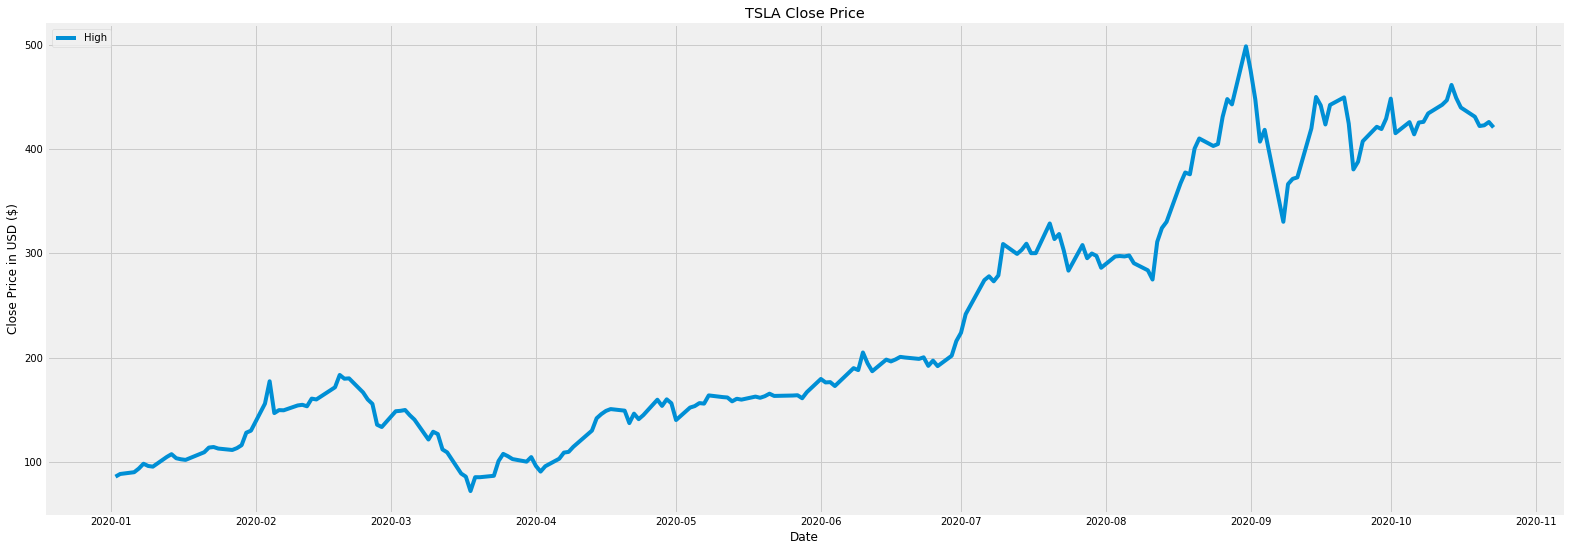

In [61]:
plt.figure(figsize=(24.2,9))
plt.plot(df['Close'], label = 'Closing Price')
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

$ typical \; price = \frac{High + Low + Close}{3} $

In [62]:
# calculate typical price
typical_price = (df['High'] + df['Low'] + df['Close'])/3
typical_price

Date
2020-01-02     85.511335
2020-01-03     88.928668
2020-01-06     89.539998
2020-01-07     92.936663
2020-01-08     97.257334
                 ...    
2020-10-19    435.566661
2020-10-20    424.246663
2020-10-21    425.613342
2020-10-22    431.843343
2020-10-23    416.966675
Length: 206, dtype: float64

$ Raw \; Money \; Flow = typical \; price * volume $

In [63]:
period = 14
money_flow = typical_price * df['Volume']
money_flow

Date
2020-01-02    4.075513e+09
2020-01-03    7.905092e+09
2020-01-06    4.536544e+09
2020-01-07    8.309514e+09
2020-01-08    1.514506e+10
                  ...     
2020-10-19    1.580576e+10
2020-10-20    1.343008e+10
2020-10-21    1.377732e+10
2020-10-22    1.727080e+10
2020-10-23    1.402288e+10
Length: 206, dtype: float64

In [64]:
# get Positive and Negative money flows
p_flow = []; n_flow=[]

for i in range(1, len(typical_price)):
    if   typical_price[i] > typical_price[i-1]:
        p_flow.append(money_flow[i-1])
        n_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        n_flow.append(money_flow[i-1])
        p_flow.append(0)
    else:
        n_flow.append(0)
        p_flow.append(0)



In [65]:
# accumulate positive and negative flows within the time period, current 14 days
p_mf=[];n_mf=[]

for i in range(period-1, len(p_flow)):
    p_mf.append( sum(p_flow[i+1-period : i+1]))
    n_mf.append( sum(n_flow[i+1-period : i+1]))

$Money \; Flow \; Index = \frac{100 * Positive \; Money \; Flow}{Positive \; Money \; Flow + Negative \; Money \; Flow} $

In [66]:
#calculate MFI
mfi = 100 * (np.array(p_mf) / (np.array(p_mf) + np.array(n_mf)))
mfi

array([50.22914775, 45.16035595, 39.87380593, 41.0440476 , 40.41717051,
       48.71984886, 59.33387957, 60.35798882, 65.1747107 , 53.44234388,
       47.38071126, 51.10583883, 52.16552582, 46.90645993, 51.81234374,
       55.6481629 , 60.51825593, 61.21060657, 62.16958305, 56.13711147,
       55.73775394, 51.92792881, 43.61033025, 50.89201197, 56.92957731,
       45.97045052, 46.84068218, 55.12115949, 48.18988638, 43.43993742,
       35.98109239, 30.34661389, 29.18964385, 31.33939745, 23.67024871,
       23.96228619, 23.99836222, 24.66151628, 24.77017101, 31.57970306,
       29.96629872, 20.84094509, 27.6821555 , 35.71946661, 34.86658448,
       34.7632069 , 28.0475386 , 33.23263967, 33.0352679 , 34.06154956,
       41.94724041, 46.17233346, 51.04973525, 46.11965611, 39.97512757,
       46.87614815, 44.12931565, 38.89191861, 48.64003927, 58.6390642 ,
       64.31392753, 57.4032426 , 71.87944534, 79.84748285, 75.39910039,
       75.17179694, 48.93378079, 61.13047345, 67.62779734, 49.90

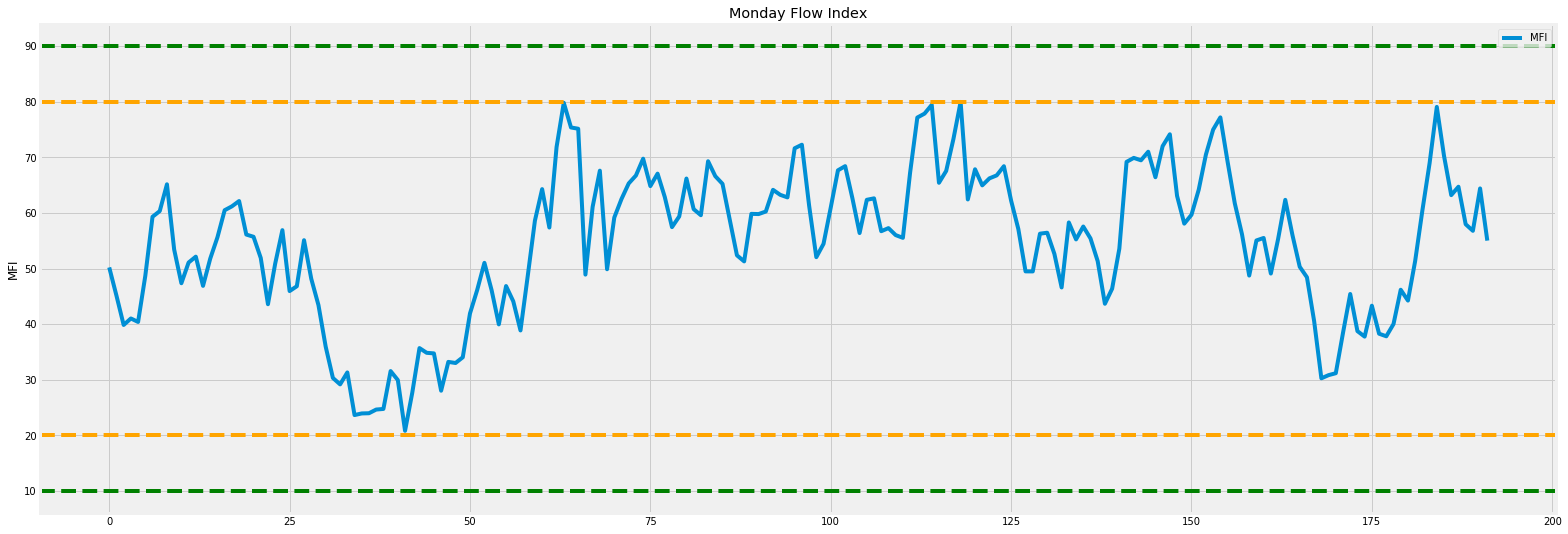

In [67]:
# matplotlib MFI
mfi_df = pd.DataFrame()
mfi_df['MFI'] = mfi
plt.figure(figsize=(24.2,9))
plt.plot(mfi_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [68]:
# add mfi results to the 1st data frame
full_df  = pd.DataFrame()
full_df = df[period:]
full_df['MFI'] = mfi
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2020-01-23,116.400002,111.120003,112.849998,114.440002,98255000.0,114.440002,50.229148
2020-01-24,114.772003,110.851997,114.125999,112.963997,71768000.0,112.963997,45.160356
2020-01-27,112.888000,107.856003,108.398003,111.603996,68040500.0,111.603996,39.873806
2020-01-28,115.362000,111.615997,113.697998,113.379997,58942500.0,113.379997,41.044048
2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,40.417171
...,...,...,...,...,...,...,...
2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800.0,430.829987,64.740008
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002,57.994989
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015,56.813176


In [69]:
# a simple function to find overbought and oversold points
def get_mfi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['MFI'])):
        if FullDataFrame['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['MFI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)


In [70]:
# add over overbought point and oversold points to dataframe
full_df['MFI_Buy']= get_mfi_points(full_df, 75, 25)[0]
full_df['MFI_Sell']= get_mfi_points(full_df, 75, 25)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell
Date,,,,,,,,,
2020-01-23,116.400002,111.120003,112.849998,114.440002,98255000.0,114.440002,50.229148,NaN,NaN
2020-01-24,114.772003,110.851997,114.125999,112.963997,71768000.0,112.963997,45.160356,NaN,NaN
2020-01-27,112.888000,107.856003,108.398003,111.603996,68040500.0,111.603996,39.873806,NaN,NaN
2020-01-28,115.362000,111.615997,113.697998,113.379997,58942500.0,113.379997,41.044048,NaN,NaN
2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,40.417171,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800.0,430.829987,64.740008,NaN,NaN
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002,57.994989,NaN,NaN
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015,56.813176,NaN,NaN


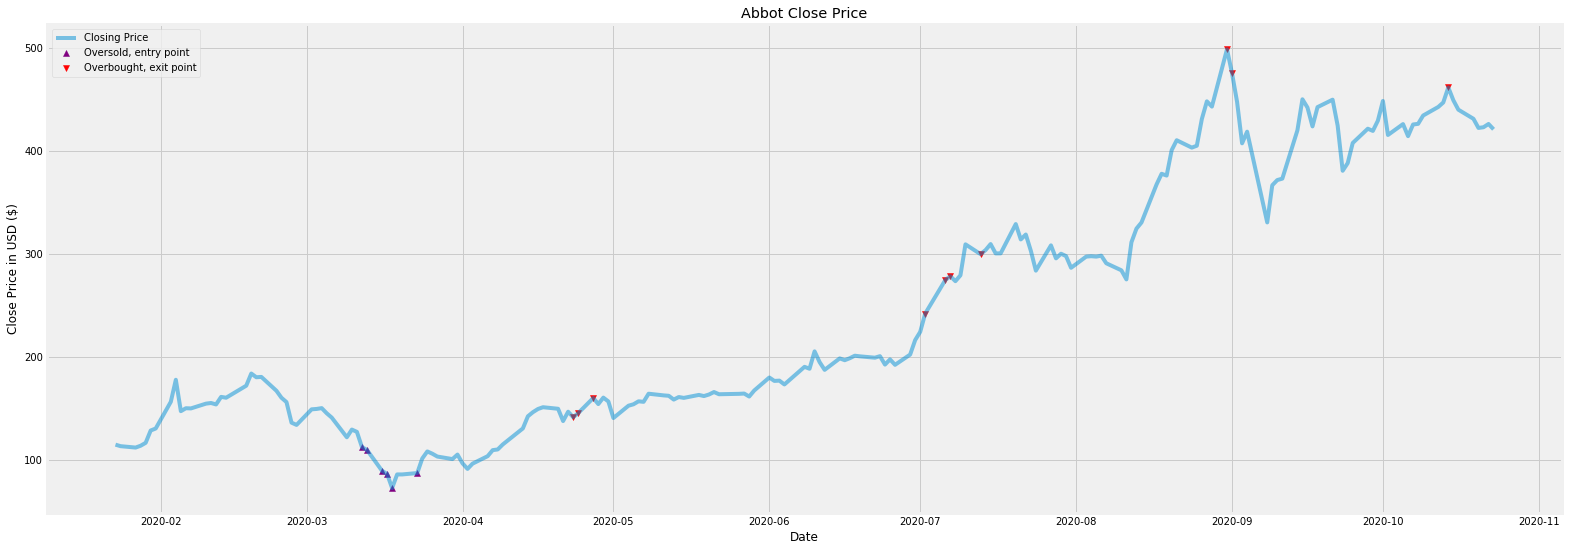

In [71]:
#draw a pretty picture to show the overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'Overbought, exit point', marker = 'v', alpha = 1)
plt.title('Abbot Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

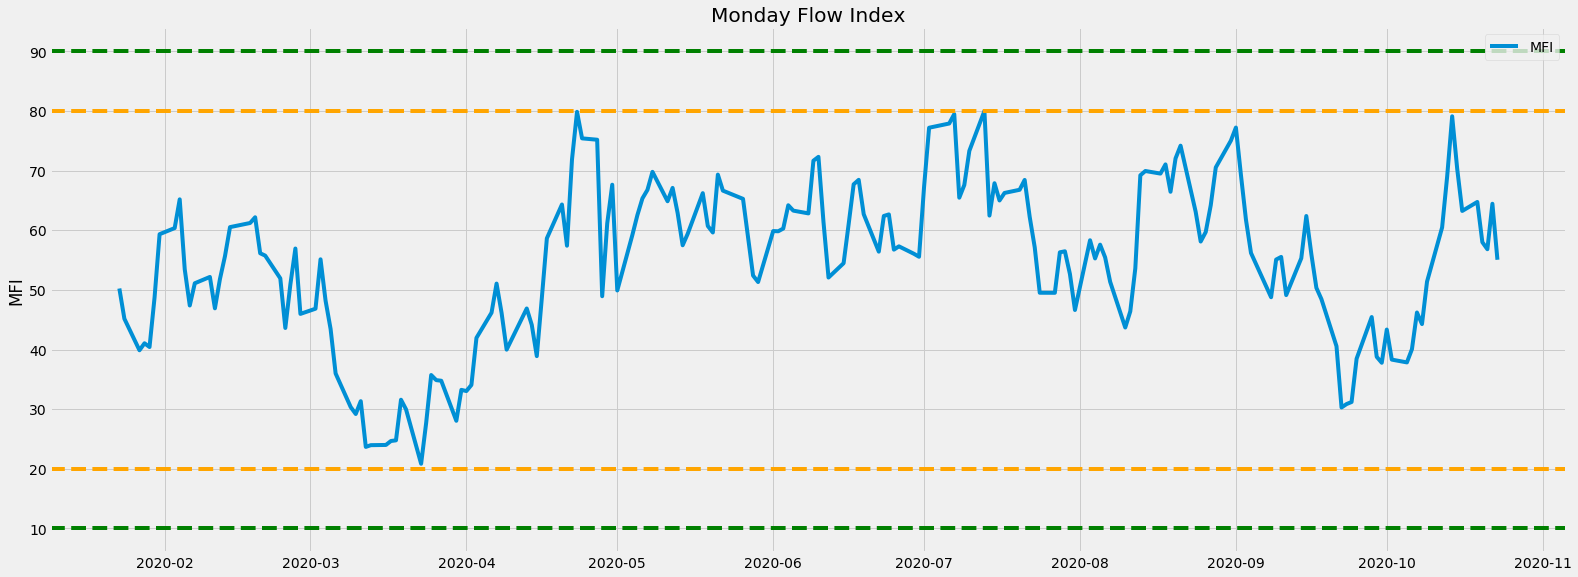

In [72]:
# Add some style to the plot so it's comparable from above plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()
# Reference from https://www.youtube.com/watch?v=tF1Lz4WBQwM

<h1> RSI, Relative Strength Index</h1>
<a class="anchor" id="RSI">RSI</a> is another momentum indicator that measures teh magnitude of recent price chane to evaluate price of a stock's overbought or oversold status. Unlike MFI, it doesn't take volume into consideration. 

In [73]:
# reference from https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
# Quicker way
delta = df['Close'].diff() #calculate the difference of daily closing price
delta

Date
2020-01-02         NaN
2020-01-03    2.549995
2020-01-06    1.706001
2020-01-07    3.503998
2020-01-08    4.616005
                ...   
2020-10-19   -8.840027
2020-10-20   -8.889984
2020-10-21    0.700012
2020-10-22    3.149994
2020-10-23   -5.160004
Name: Close, Length: 206, dtype: float64

In [74]:
dUp, dDown = delta.copy(), delta.copy()
dUp[dUp < 0] = 0
dDown[dDown > 0] = 0
RolUp = dUp.rolling(period).mean() # previous 14 days average gain
RolDown = dDown.rolling(period).mean().abs() # !! different from what's described in https://www.investopedia.com/terms/r/rsi.asp

RS = RolUp / RolDown
RS

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2020-10-19    1.156300
2020-10-20    0.915963
2020-10-21    0.696660
2020-10-22    1.209558
2020-10-23    0.910174
Name: Close, Length: 206, dtype: float64

In [75]:
rsi= 100.0 - (100.0 / (1.0 + RS))
rsi

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2020-10-19    53.624255
2020-10-20    47.806933
2020-10-21    41.060671
2020-10-22    54.742075
2020-10-23    47.648762
Name: Close, Length: 206, dtype: float64

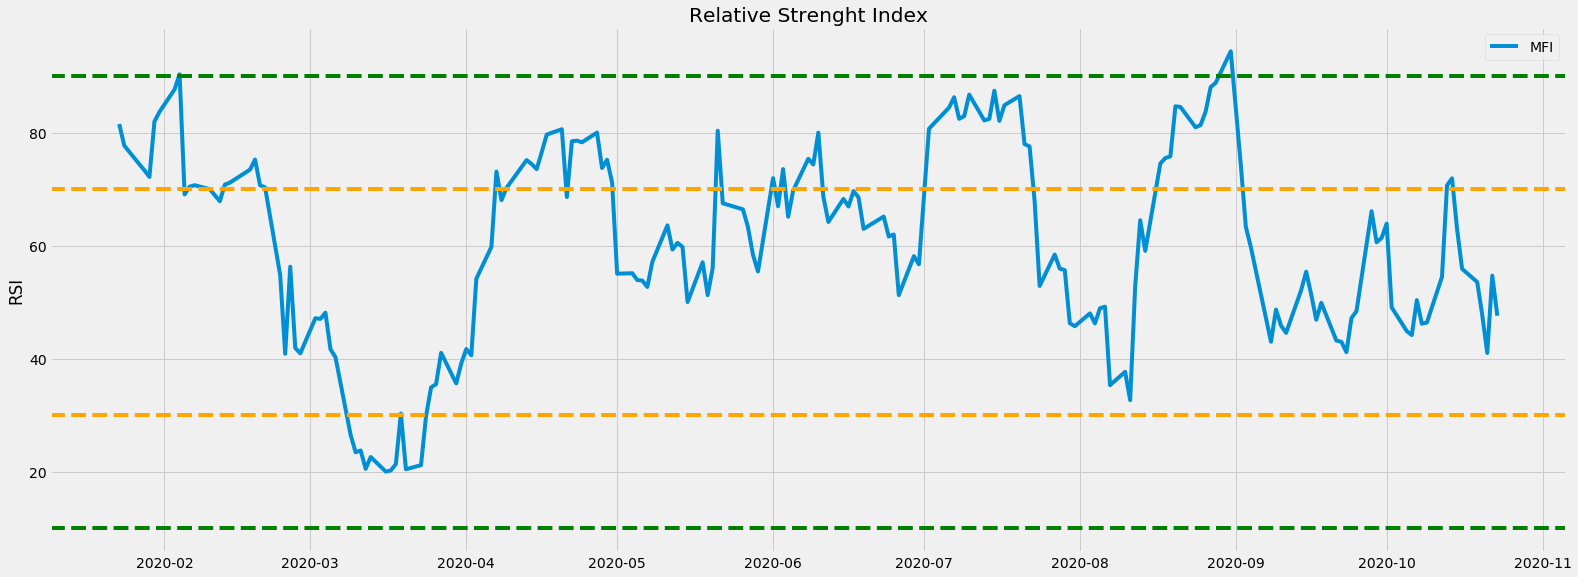

In [76]:
# matplotlib MFI
plt.figure(figsize=(24.2,9))
plt.plot(rsi, label = 'Relative Strenght Index')
plt.title('Relative Strenght Index')
# plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(30, linestyle= '--', color = 'orange')
plt.axhline(70, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [77]:
# add rsi results to the mfi data frame
full_df['RSI'] = rsi[period:]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI
Date,,,,,,,,,,
2020-01-23,116.400002,111.120003,112.849998,114.440002,98255000.0,114.440002,50.229148,NaN,NaN,81.575896
2020-01-24,114.772003,110.851997,114.125999,112.963997,71768000.0,112.963997,45.160356,NaN,NaN,77.761051
2020-01-27,112.888000,107.856003,108.398003,111.603996,68040500.0,111.603996,39.873806,NaN,NaN,74.460153
2020-01-28,115.362000,111.615997,113.697998,113.379997,58942500.0,113.379997,41.044048,NaN,NaN,73.404447
2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,40.417171,NaN,NaN,72.209154
...,...,...,...,...,...,...,...,...,...,...
2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800.0,430.829987,64.740008,NaN,NaN,53.624255
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002,57.994989,NaN,NaN,47.806933
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015,56.813176,NaN,NaN,41.060671


In [78]:
# a similar function to find bullish and bearing momentum points
def get_rsi_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['RSI'])):
        if FullDataFrame['RSI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['RSI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [79]:
# add over overbought point and oversold points to dataframe
full_df['RSI_Buy']= get_rsi_points(full_df, 70, 30)[0]
full_df['RSI_Sell']= get_rsi_points(full_df, 70, 30)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,MFI_Buy,MFI_Sell,RSI,RSI_Buy,RSI_Sell
Date,,,,,,,,,,,,
2020-01-23,116.400002,111.120003,112.849998,114.440002,98255000.0,114.440002,50.229148,NaN,NaN,81.575896,NaN,114.440002
2020-01-24,114.772003,110.851997,114.125999,112.963997,71768000.0,112.963997,45.160356,NaN,NaN,77.761051,NaN,112.963997
2020-01-27,112.888000,107.856003,108.398003,111.603996,68040500.0,111.603996,39.873806,NaN,NaN,74.460153,NaN,111.603996
2020-01-28,115.362000,111.615997,113.697998,113.379997,58942500.0,113.379997,41.044048,NaN,NaN,73.404447,NaN,113.379997
2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,40.417171,NaN,NaN,72.209154,NaN,116.197998
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800.0,430.829987,64.740008,NaN,NaN,53.624255,NaN,NaN
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002,57.994989,NaN,NaN,47.806933,NaN,NaN
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015,56.813176,NaN,NaN,41.060671,NaN,NaN


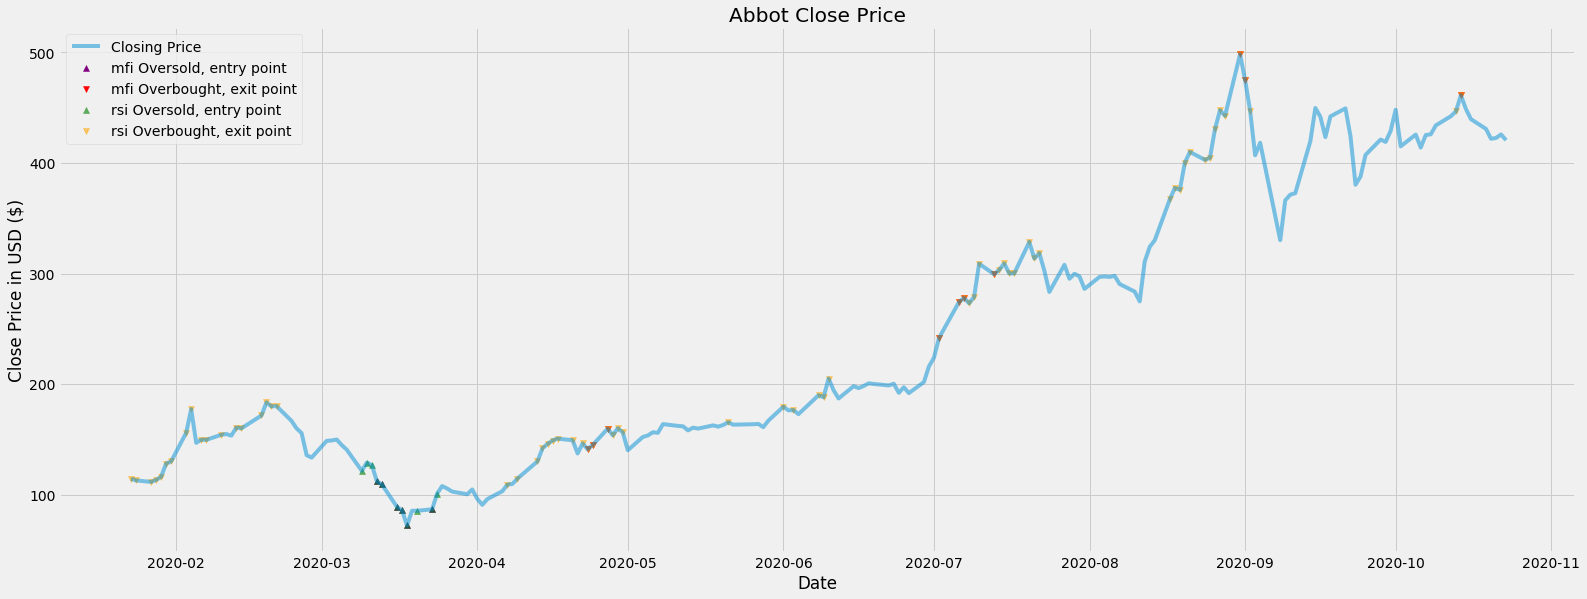

In [80]:
#draw a pretty picture to show the RSI overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', label = 'rsi Oversold, entry point', marker = '^', alpha = 0.6)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.6)
plt.title('Abbot Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

<h1>Bollinger Band Strategy</h1>
<a class="anchor" id="BBS">BBS</a> is another technical analysis tool to find entry and exit price trending SMA's standard deviation of a security's price


$ MA = Moving \; Average \; where \; SMA \; usually \; use \; n=20$ <br>
$ typical \; price = \frac{High + Low + Close}{3} $ <br>
$ m = 2 \; number \; of \; standard \; deviation; \; m = 2σ  $


In [81]:
# Calculate SMA20, Standard Deviation σ
sma_period = 20
df['SMA'] = df['Close'].rolling(window=sma_period).mean()
df['2xSTD'] = df['Close'].rolling(window=sma_period).std() * 2
df['Tp_SMA'] = typical_price.rolling(window=sma_period).mean()
df['2xTPSTD'] = df['Close'].rolling(window=sma_period).std() * 2

Bollinger Bands Upper Bands <br>
$B_Upper = MA(TP,n) + m∗σ[TP,n] $<br><br>
Bollinger Bands Lower Bands, Simliarly  <br>
$B_Lower = MA(TP,n) - m∗σ[TP,n] $

In [82]:
# calculate upper band and lower band
# df['Upper'] = df['SMA'] + (df['STD'] * 2 )
# df['Lower'] = df['SMA'] - (df['STD'] * 2 )
df['Upper']= df['Tp_SMA'] + df['2xTPSTD'] 
df['Lower']= df['Tp_SMA'] - df['2xTPSTD'] 


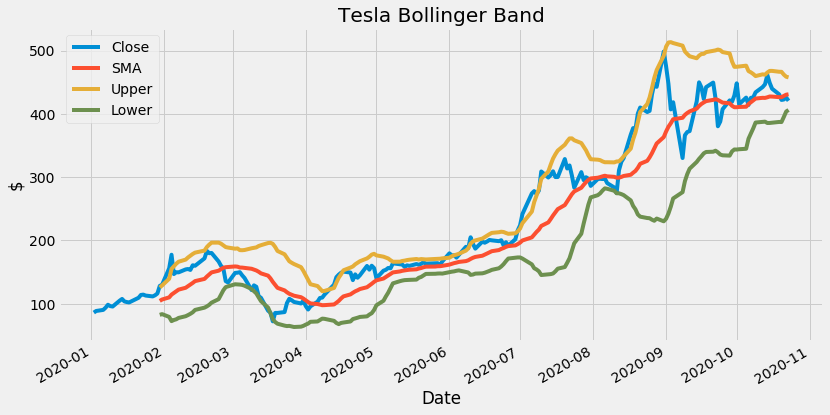

In [83]:
column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Tesla Bollinger Band')
plt.ylabel('$')
plt.show()

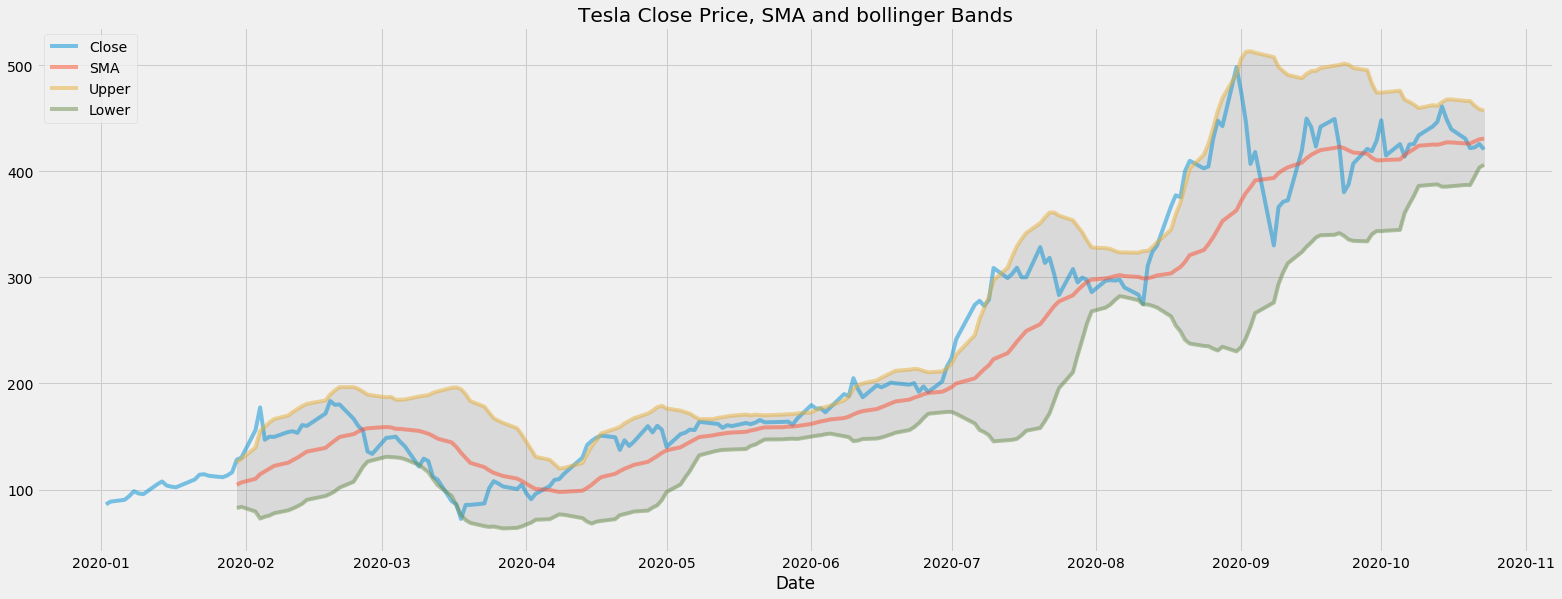

In [84]:
#shade the area
x_axis=df.index
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Tesla Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.legend(column_list, loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

In [85]:
def get_b_band_points(bband, period):
    bband_entry = []; bband_exit=[]

    for i in range(len(bband['Close'])):
        if bband['Close'][i] > bband['Upper'][i]: # close > upper band, sell
            bband_entry.append(np.nan)
            bband_exit.append(bband['Close'][i])
        elif bband['Close'][i] < bband['Lower'][i]: # close < lower band, buy
            bband_exit.append(np.nan)
            bband_entry.append(bband['Close'][i])
        else:
            bband_exit.append(np.nan)
            bband_entry.append(np.nan)
    return (bband_entry[period:], bband_exit[period:])


In [86]:
full_df['Bband_Buy'] = get_b_band_points(df, period)[0]
full_df['Bband_Sell'] = get_b_band_points(df, period)[1]

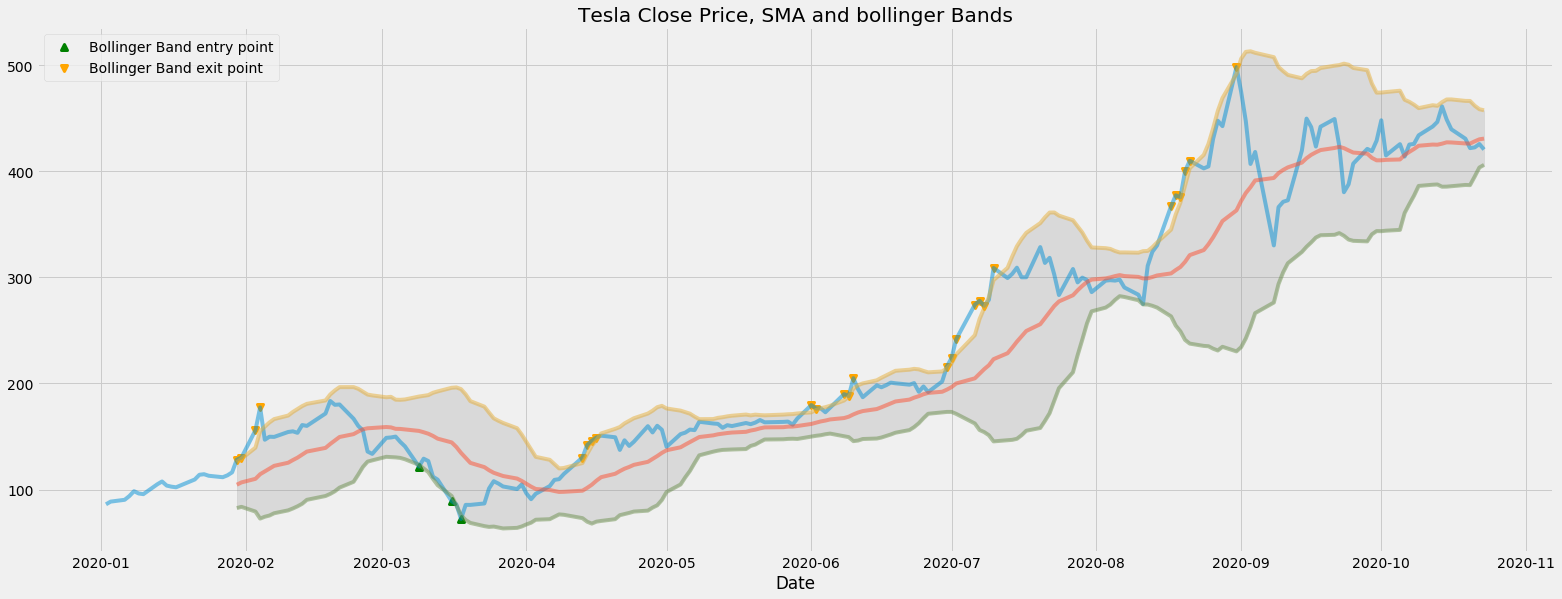

In [87]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(df[column_list],  alpha = 0.5)
plt.title('Tesla Close Price, SMA and bollinger Bands')
plt.xlabel('Date')
plt.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey', alpha = 0.2)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'green', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'orange', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.legend(loc='upper left')
# plt.xticks(rotation = 45)
plt.show()

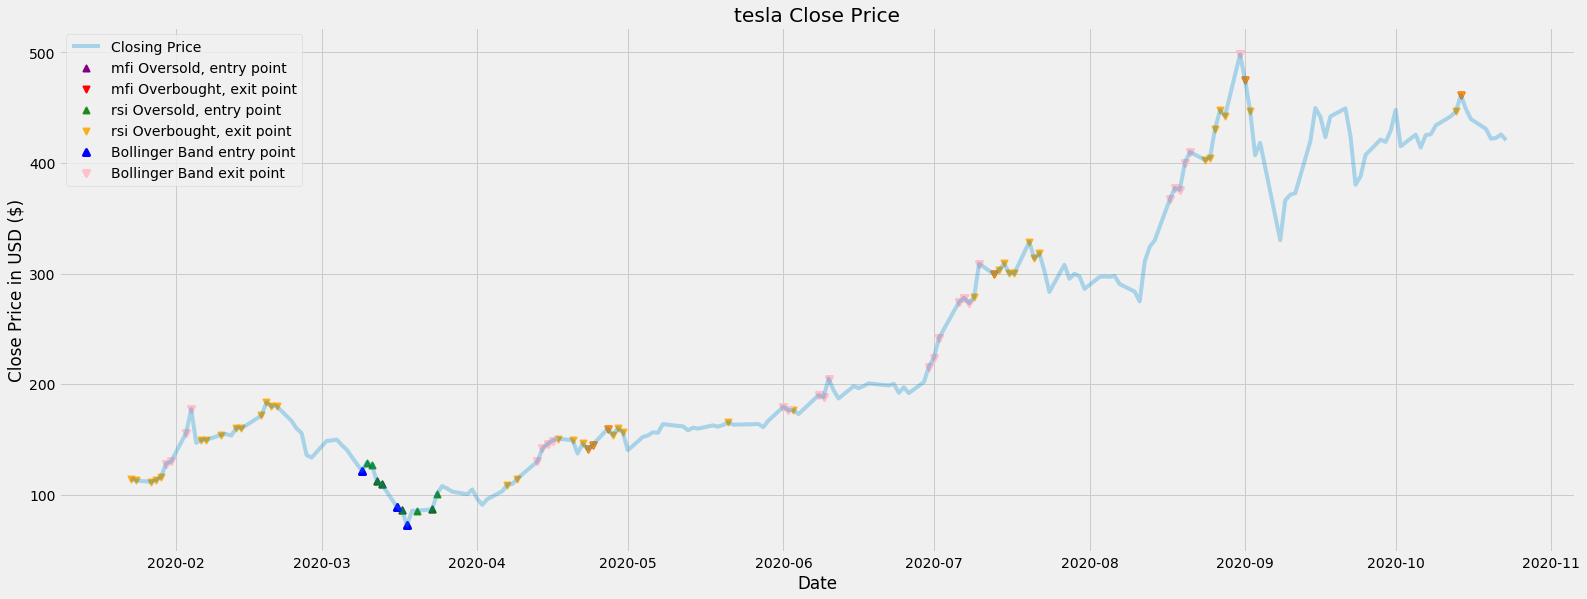

In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.3)
plt.scatter(full_df.index, full_df['MFI_Buy'], color = 'purple', lw=2, label = 'mfi Oversold, entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['MFI_Sell'], color = 'red', lw=2, label = 'mfi Overbought, exit point', marker = 'v', alpha = 1)
plt.scatter(full_df.index, full_df['RSI_Buy'], color = 'green', lw=2, label = 'rsi Oversold, entry point', marker = '^', alpha = 0.8)
plt.scatter(full_df.index, full_df['RSI_Sell'], color = 'orange', lw=2, label = 'rsi Overbought, exit point', marker = 'v', alpha = 0.8)
plt.scatter(full_df.index, full_df['Bband_Buy'], color = 'blue', lw=3, label = 'Bollinger Band entry point', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Bband_Sell'], color = 'pink', lw=3, label = 'Bollinger Band exit point', marker = 'v', alpha = 1)
plt.title('tesla Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()